## Machine Learning Based on Python


### Logistic regression
#### Classify the Iris dataset using Logistic Regression

Logistic regression: Classification using a linear decision boundary.
The logistic function gives the probability of belongingness to each class defined with respect to the decision boundaries. The logistic function is defined as follows: 
            $$\sigma(z)=\frac{1}{1+e^{-z}}$$ 

#### Prepare data:
The data has 4 input-features and 3 output-classes. For simplicity we will use only two features: sepal-length and sepal-width (both in cm) and two output classes: Iris Setosa and Iris Versicolour.


In [1]:
import numpy as np
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()
# X1 = iris.data
# Y1 = iris.target
# print(X1, Y1)
X = iris.data[:,:2] #Choosing only the first two input-features
Y = iris.target
n_samp = len(Y)
print('No. of Sample: ', n_samp)
print(Y)

No. of Sample:  150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Randonly split the Dataset into Training (70%), Validation (15%), and Testing (15%)

In [3]:
random_indices = np.random.permutation(n_samp)
#Training set
num_training_samples = int(n_samp * 0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]

#Validation set
num_validation_samples = int(n_samp*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(n_samp*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]

In [4]:
print('Train: ',len(x_train),'Valid: ',len(x_val),'Test: ',len(x_test))

Train:  105 Valid:  22 Test:  22


### Visualize Training Data

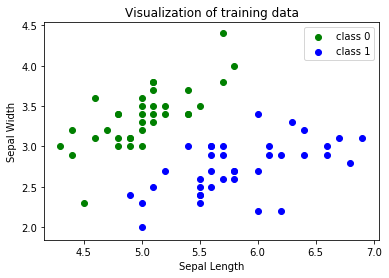

In [5]:
#Picking only the first two classes
X_class0 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==0]) 
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)

X_class1 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)

plt.scatter([X_class0[:,0]], [X_class0[:,1]],color='green')
plt.scatter([X_class1[:,0]], [X_class1[:,1]],color='blue')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(['class 0','class 1'])
plt.title('Visualization of training data')
plt.show()

### Fit Logistic Regression

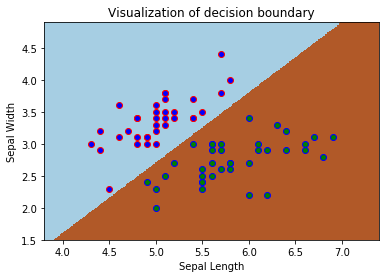

In [6]:
model = linear_model.LogisticRegression(C=1e4)#C is the inverse of the regularization factor

full_X = np.concatenate((X_class0,X_class1),axis=0)
full_Y = np.concatenate((Y_class0,Y_class1),axis=0)

model.fit(full_X,full_Y)

# Plot the decision boundary. [x_min, m_max] x [y_min, y_max].
h = 0.01  # step size in the mesh
x_min, x_max = full_X[:, 0].min() - 0.5, full_X[:, 0].max() + 0.5
y_min, y_max = full_X[:, 1].min() - 0.5, full_X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
 
#predict for the entire mesh to find the regions for each class in the feature space
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter([X_class0[:, 0]], [X_class0[:, 1]], c='blue', edgecolors='r', cmap=plt.cm.Paired)
plt.scatter([X_class1[:, 0]], [X_class1[:, 1]], c='green', edgecolors='b', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Visualization of decision boundary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### Evaluate the Model

In [7]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,2)))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i] != y_val[i]:
        validation_misclassification_percentage += 1
validation_misclassification_percentage *= 100/len(y_val)
print ('Valid_misclass_percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,2)))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i] != y_test[i]:
        test_misclassification_percentage += 1
test_misclassification_percentage *= 100/len(y_test)
print ('Test_misclass_percentage =', test_misclassification_percentage, '%')

Valid_misclass_percentage = 40.909090909090914 %
Test_misclass_percentage = 36.36363636363637 %
